In [337]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import pydot
import datetime
import geopandas as gpd
import seaborn as sns
import warnings
import datetime
import calendar
import matplotlib.dates as mdates

In [295]:
os.chdir('c:\\Users\\Jesse\\OneDrive\\Documenten\\Master BAOR\\Thesis\\GitHub\\dicra\\analytics\\sandbox\\notebooks\\crop_fires\\Model\\Data')
data_harvest = pd.read_csv('Data_final.csv', index_col = 0)
data_all = pd.read_csv('Data_all_final.csv', index_col = 0)
#data = gpd.read_file('Data_full_mandals.geojson')

os.chdir('c:\\Users\\Jesse\\OneDrive\\Documenten\\Master BAOR\\Thesis\\GitHub\\dicra\\src\\data_preprocessing\\tsdm\\')
mandal_boundaries = gpd.read_file('Mandal_Boundary.shp')
mandal_boundaries = mandal_boundaries.reset_index()

In [296]:
warnings.filterwarnings('ignore')

In [297]:
data_all['ModifiedDateTime'] =  pd.to_datetime(data_all['ModifiedDateTime'])

In [298]:
len(data_all), len(data_harvest)

(20063, 8218)

In [299]:
data_all = data_all.reset_index()
del data_all['level_0']
data_all = data_all.sort_values(by=['index', 'ModifiedDateTime'])

In [301]:
data_all['ModifiedDateTime'] = pd.to_datetime(data_all['ModifiedDateTime'])

In [302]:
data_all.columns

Index(['index', 'Mandal_Nam', 'Dist_Name', 'ModifiedDateTime', 'Year', 'Month',
       'Fires', 'FRP', 'Season', 'NO2', 'PM2.5', 'SSM_mean', 'SSM_median',
       'SSM_min', 'SSM_max', 'SSM_percentile_90', 'PRE_mean', 'PRE_median',
       'PRE_min', 'PRE_max', 'PRE_percentile_90', 'PRE_sum', 'POP_mean',
       'POP_median', 'ST_mean', 'ST_median', 'ST_min', 'ST_max',
       'ST_percentile_90', 'RWI_mean', 'RWI_median', 'RWI_min', 'RWI_max',
       'RWI_percentile_90', 'BA_mean', 'BA_median', 'BA_sum', 'Area_Crops',
       'Crops_Prop', 'Area_Trees', 'Trees_Prop', 'Area_Built_Area',
       'Built_Area_Prop', 'PowP_score', 'Soil Type', 'Area',
       'Harvested_CropA_Paddy', 'Harvested_CropA_Maize',
       'Harvested_CropA_Soybean', 'Harvested_CropA_Cotton',
       'Harvested_CropA_Chillies', 'Harvested_CropA_Turmeric',
       'SoilT_Chromic_Luvisols', 'SoilT_Chromic_Vertisols',
       'SoilT_Eutric_Nitosols', 'SoilT_Lithosols', 'SoilT_Pellic_luvisols',
       'SoilT_Plinthic_Luvisols', '

In [303]:
data_all = data_all.rename(columns = {'ModifiedDateTime': 'Date', 'Area_Crops': 'Crops_count', 'Area_Built_Area': 'Built_count', 'Built_Area_Prop': 'Built_Area_proportion', 'SoilT_Pellic_Luvisols': 'SoilT_majority_Pellic_Luvisols', 'Crops_Prop': 'Crops_proportion', 'SoilT_Chromic_Vertisols': 'SoilT_majority_Chromic_Vertisols',
       'SoilT_Eutric_Nitosols' : 'SoilT_majority_Eutric_Nitosols', 'SoilT_Lithosols': 'SoilT_majority_Lithosols', 'SoilT_Pellic_luvisols': 'SoilT_majority_Pellic_Luvisols', 'SoilT_Plinthic_Luvisols': 'SoilT_majority_Plinthic_Luvisols', 
       'SoilT_Vertic_Cambisols': 'SoilT_majority_Vertic_Cambisols', 'SoilT_Chromic_Luvisols': 'SoilT_majority_Chromic_Luvisols' })

In [372]:
data_features = data_all[['index', 'Mandal_Nam', 'Dist_Name', 'Date', 'Month', 'Year', 
       'SSM_mean', 'SSM_median', 'SSM_min', 'SSM_max', 'SSM_percentile_90', 
       'PRE_mean', 'PRE_median', 'PRE_min', 'PRE_max', 'PRE_percentile_90', 'PRE_sum', 
       'POP_mean', 'POP_median',
       'ST_mean', 'ST_median', 'ST_min', 'ST_max', 'ST_percentile_90',
       'RWI_mean', 'RWI_median', 'RWI_min', 'RWI_max', 'RWI_percentile_90', 
       'BA_sum', 
       'Crops_count', 'Crops_proportion',
       'Built_count', 'Built_Area_proportion',
       'PowP_score',
       'Harvested_CropA_Paddy', 'Harvested_CropA_Maize', 'Harvested_CropA_Soybean', 'Harvested_CropA_Cotton', 'Harvested_CropA_Chillies', 'Harvested_CropA_Turmeric',
       'SoilT_majority_Chromic_Luvisols', 'SoilT_majority_Chromic_Vertisols', 'SoilT_majority_Eutric_Nitosols', 'SoilT_majority_Lithosols', 'SoilT_majority_Pellic_Luvisols', 'SoilT_majority_Plinthic_Luvisols', 'SoilT_majority_Vertic_Cambisols']]

features = ['SSM_mean', 'SSM_median', 'SSM_min', 'SSM_max', 'SSM_percentile_90', 
       'PRE_mean', 'PRE_median', 'PRE_min', 'PRE_max', 'PRE_percentile_90', 'PRE_sum', 
       'ST_mean', 'ST_median', 'ST_min', 'ST_max', 'ST_percentile_90',
       'BA_sum', 
       'PowP_score',
       'POP_mean', 'POP_median',
       'RWI_mean', 'RWI_median', 'RWI_min', 'RWI_max', 'RWI_percentile_90', 
       'Built_count', 'Built_Area_proportion',
       'Crops_count', 'Crops_proportion',
       'Harvested_CropA_Paddy', 'Harvested_CropA_Maize', 'Harvested_CropA_Soybean', 'Harvested_CropA_Cotton', 'Harvested_CropA_Chillies', 'Harvested_CropA_Turmeric',
       'SoilT_majority_Chromic_Luvisols', 'SoilT_majority_Chromic_Vertisols', 'SoilT_majority_Eutric_Nitosols', 'SoilT_majority_Lithosols', 'SoilT_majority_Pellic_Luvisols', 'SoilT_majority_Plinthic_Luvisols', 'SoilT_majority_Vertic_Cambisols']

units = ['mm', 'mm', 'mm', 'mm', 'mm', 'mm', 'mm', 'mm', 'mm', 'mm', 'mm', 'degrees', 'degrees', 'degrees', 'degrees', 'degrees', 'km2', 'score', 'population per km2', '-', '-', '-', '-', '-', 'km2', '-', 'km2', '-', 'km2', 'km2', 'km2', 'km2', 'km2', 'km2', '-', '-', '-',
 '-', '-', '-', '-']

In [305]:
data_predictors = data_all[['index', 'Mandal_Nam', 'Dist_Name', 'Date', 'Month', 'Year', 'NO2', 'PM2.5', 'Fires', 'FRP']]

In [306]:
all = ['NO2', 'PM2.5', 'Fires', 'FRP',
       'SSM_mean', 'SSM_median', 'SSM_min', 'SSM_max', 'SSM_percentile_90', 
       'PRE_mean', 'PRE_median', 'PRE_min', 'PRE_max', 'PRE_percentile_90', 'PRE_sum', 
       'ST_mean', 'ST_median', 'ST_min', 'ST_max', 'ST_percentile_90',
       'BA_sum', 
       'PowP_score',
       'POP_mean', 'POP_median',
       'RWI_mean', 'RWI_median', 'RWI_min', 'RWI_max', 'RWI_percentile_90', 
       'Built_count', 'Built_Area_proportion',
       'Crops_count', 'Crops_proportion',
       'Harvested_CropA_Paddy', 'Harvested_CropA_Maize', 'Harvested_CropA_Soybean', 'Harvested_CropA_Cotton', 'Harvested_CropA_Chillies', 'Harvested_CropA_Turmeric',
       'SoilT_majority_Chromic_Luvisols', 'SoilT_majority_Chromic_Vertisols', 'SoilT_majority_Eutric_Nitosols', 'SoilT_majority_Lithosols', 'SoilT_majority_Pellic_Luvisols', 'SoilT_majority_Plinthic_Luvisols', 'SoilT_majority_Vertic_Cambisols']

# Predictor Plots

In [346]:
def predictor_plot(data_predictors, predictor:str, unit: str):
    avg = data_predictors.groupby(['Month'])[predictor].mean().reset_index()
    avg['Month_text'] = 0
    for i in range(0, len(avg)):
            avg['Month_text'].iloc[i] = calendar.month_name[avg['Month'].iloc[i]] 
    
    myFmt = mdates.DateFormatter('%Y-%b') 
    avg_date = data_predictors.groupby(['Date'])[predictor].mean().reset_index()
    #avg_date['Date'] = avg_date['Date'].astype(str)
    fig, (ax1, ax2) = plt.subplots(1, 2, sharey = True, figsize=(20, 4))

    ax1.plot(avg_date['Date'], avg_date[predictor])
    ax1.set_xlabel('Date', fontsize = 15)
    ax1.set_ylabel(unit, fontsize = 15)
    ax1.set_xticklabels(avg_date['Date'], rotation=45)
    ax1.xaxis.set_major_formatter(myFmt)
    ax2.plot(avg['Month_text'], avg[predictor])
    ax2.set_xlabel('Month', fontsize = 15)
    ax2.set_xticklabels(avg['Month_text'], rotation=45)

    
    return plt.show()

In [325]:
def predictor_hist(data_predictors, predictor, unit):
    plt.hist(data_predictors[predictor], bins = 50)
    plt.xlabel(predictor + ' in ' + unit)
    plt.title('Distribution ' + predictor)

    return plt.show()

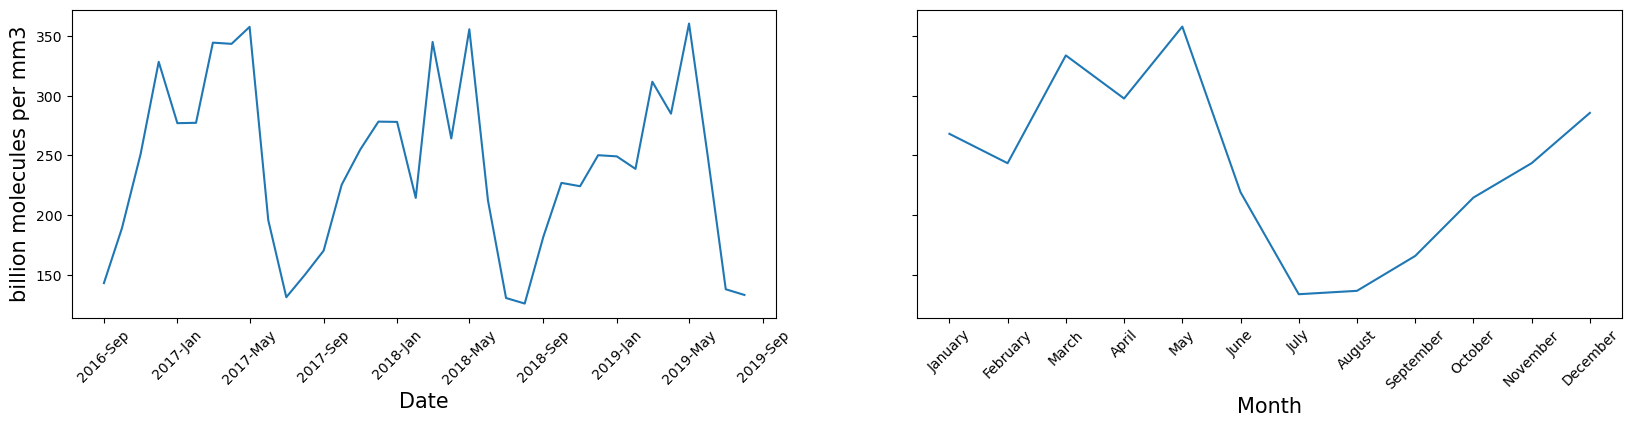

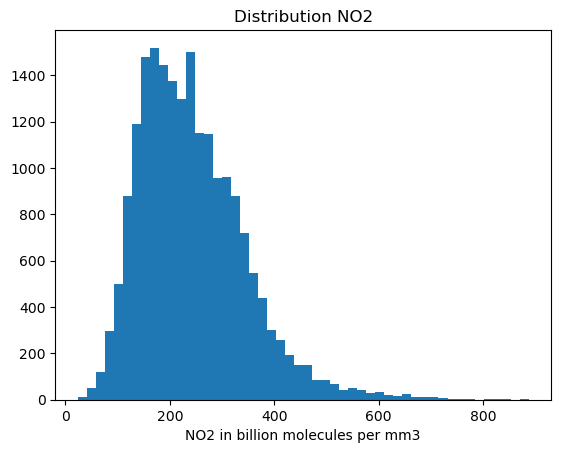

In [347]:
predictor_plot(data_predictors, 'NO2', 'billion molecules per mm3')

predictor_hist(data_predictors, 'NO2', 'billion molecules per mm3')

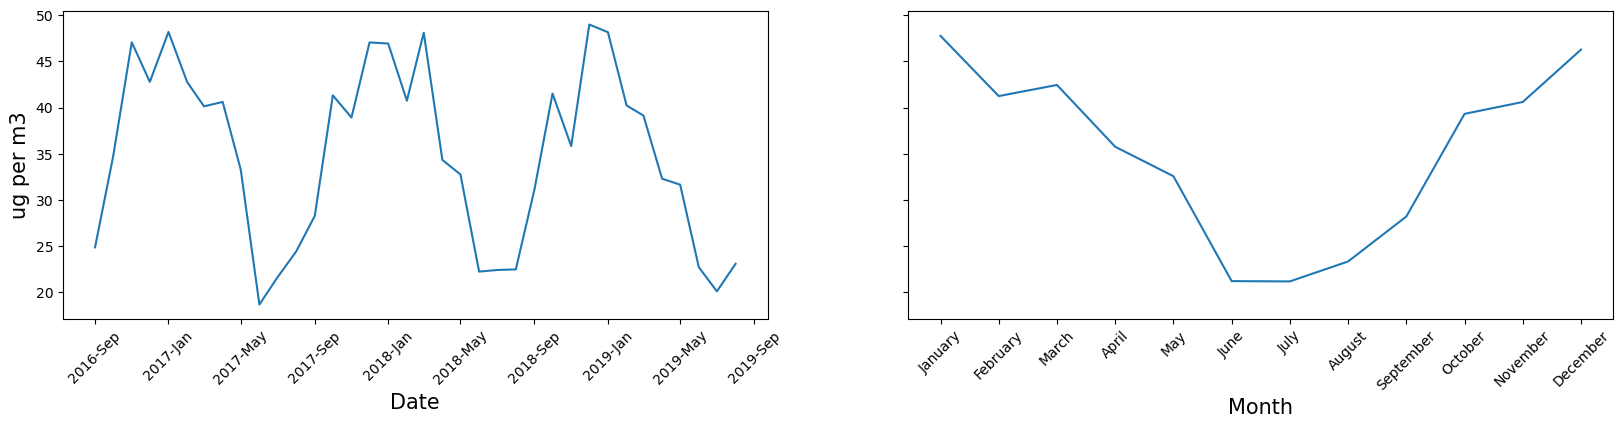

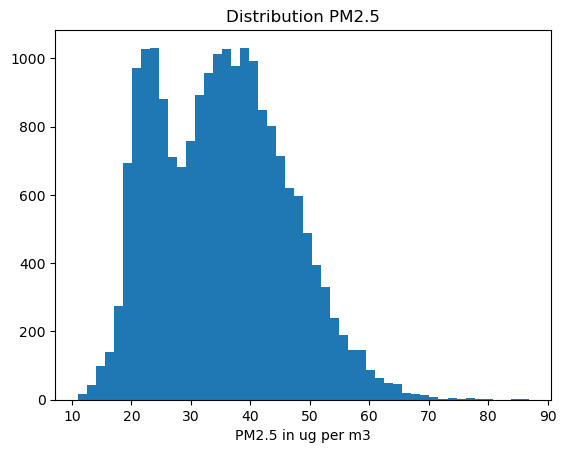

In [348]:
predictor_plot(data_predictors, 'PM2.5', 'ug per m3')
predictor_hist(data_predictors, 'PM2.5', 'ug per m3')

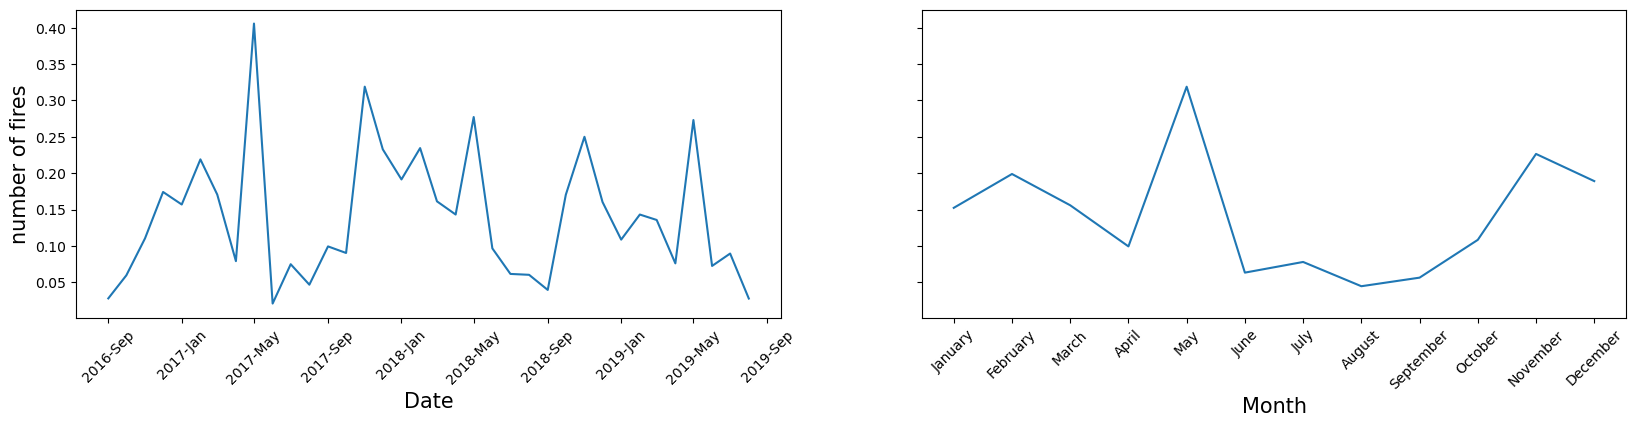

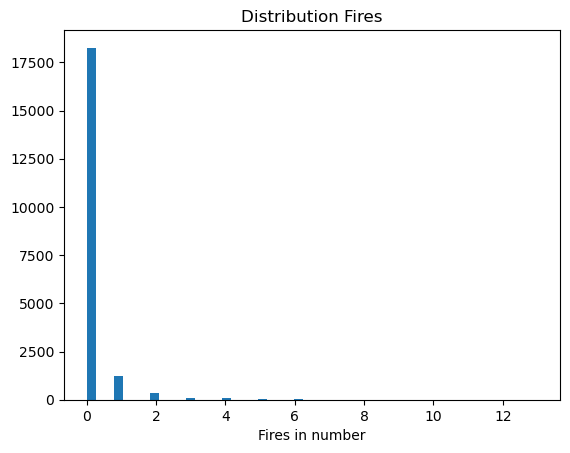

In [349]:
predictor_plot(data_predictors, 'Fires', 'number of fires')
predictor_hist(data_predictors, 'Fires', 'number')

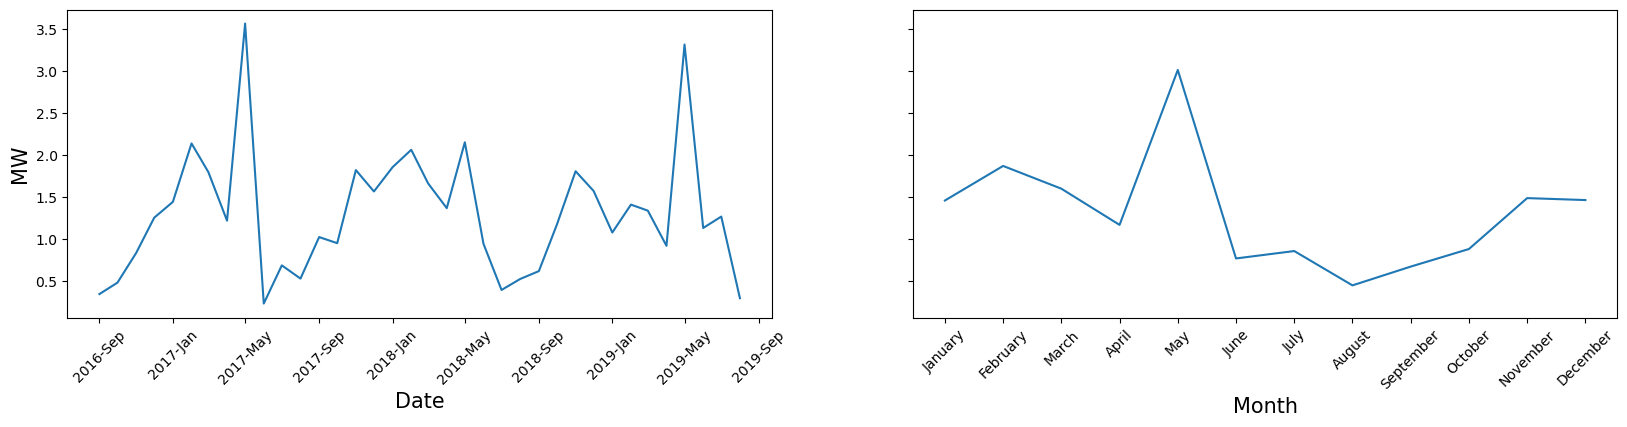

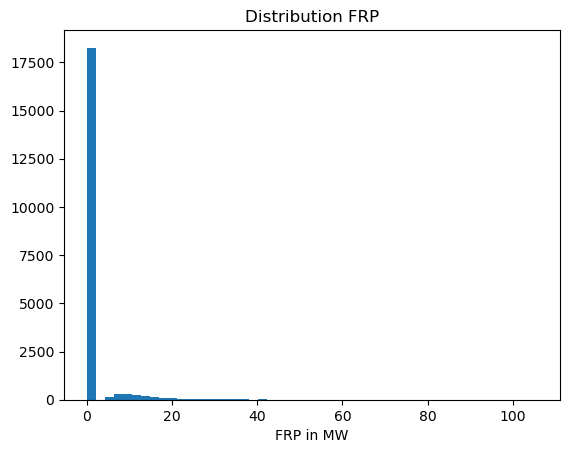

In [350]:
predictor_plot(data_predictors, 'FRP', 'MW')
predictor_hist(data_predictors, 'FRP', 'MW')

# Correlations independent variables

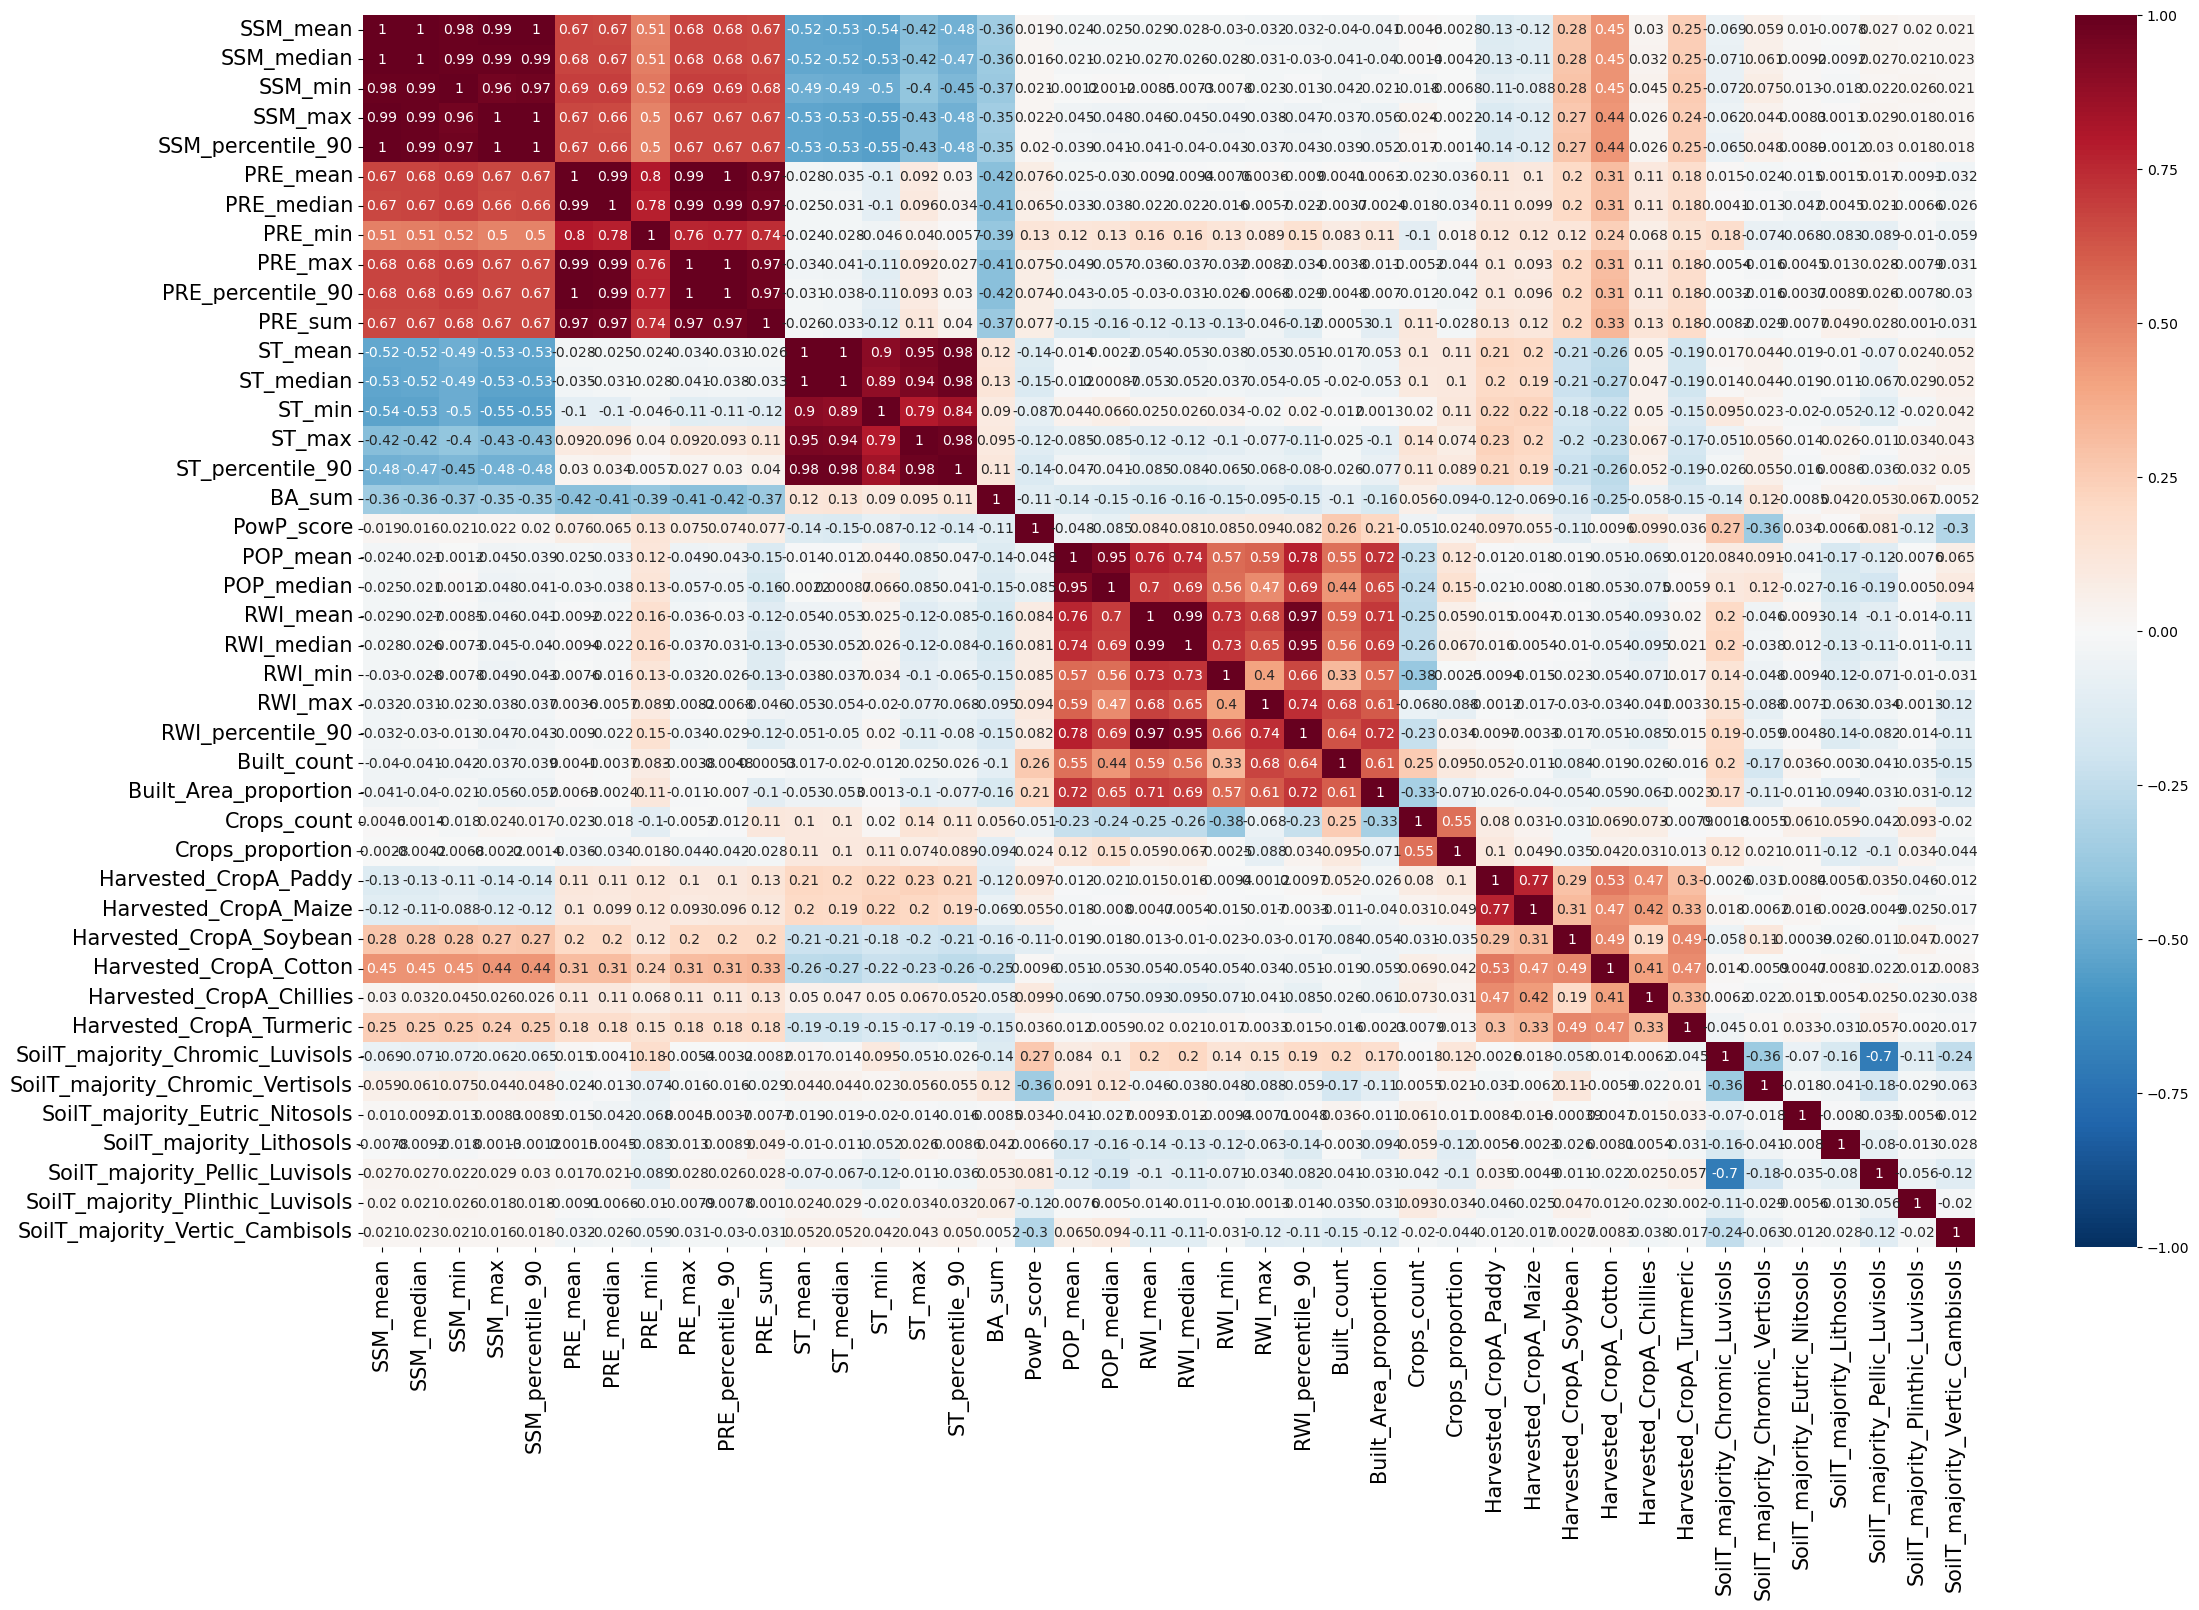

In [624]:
data_corr = data_all[features]


plt.figure(figsize=(26, 16))
heatmap = sns.heatmap(data_corr.corr(method='spearman'), vmin=-1, vmax=1, annot=True, cmap = 'RdBu_r')
heatmap.set_xticklabels(features, fontsize=15)
heatmap.set_yticklabels(features, fontsize=15)
plt.show()

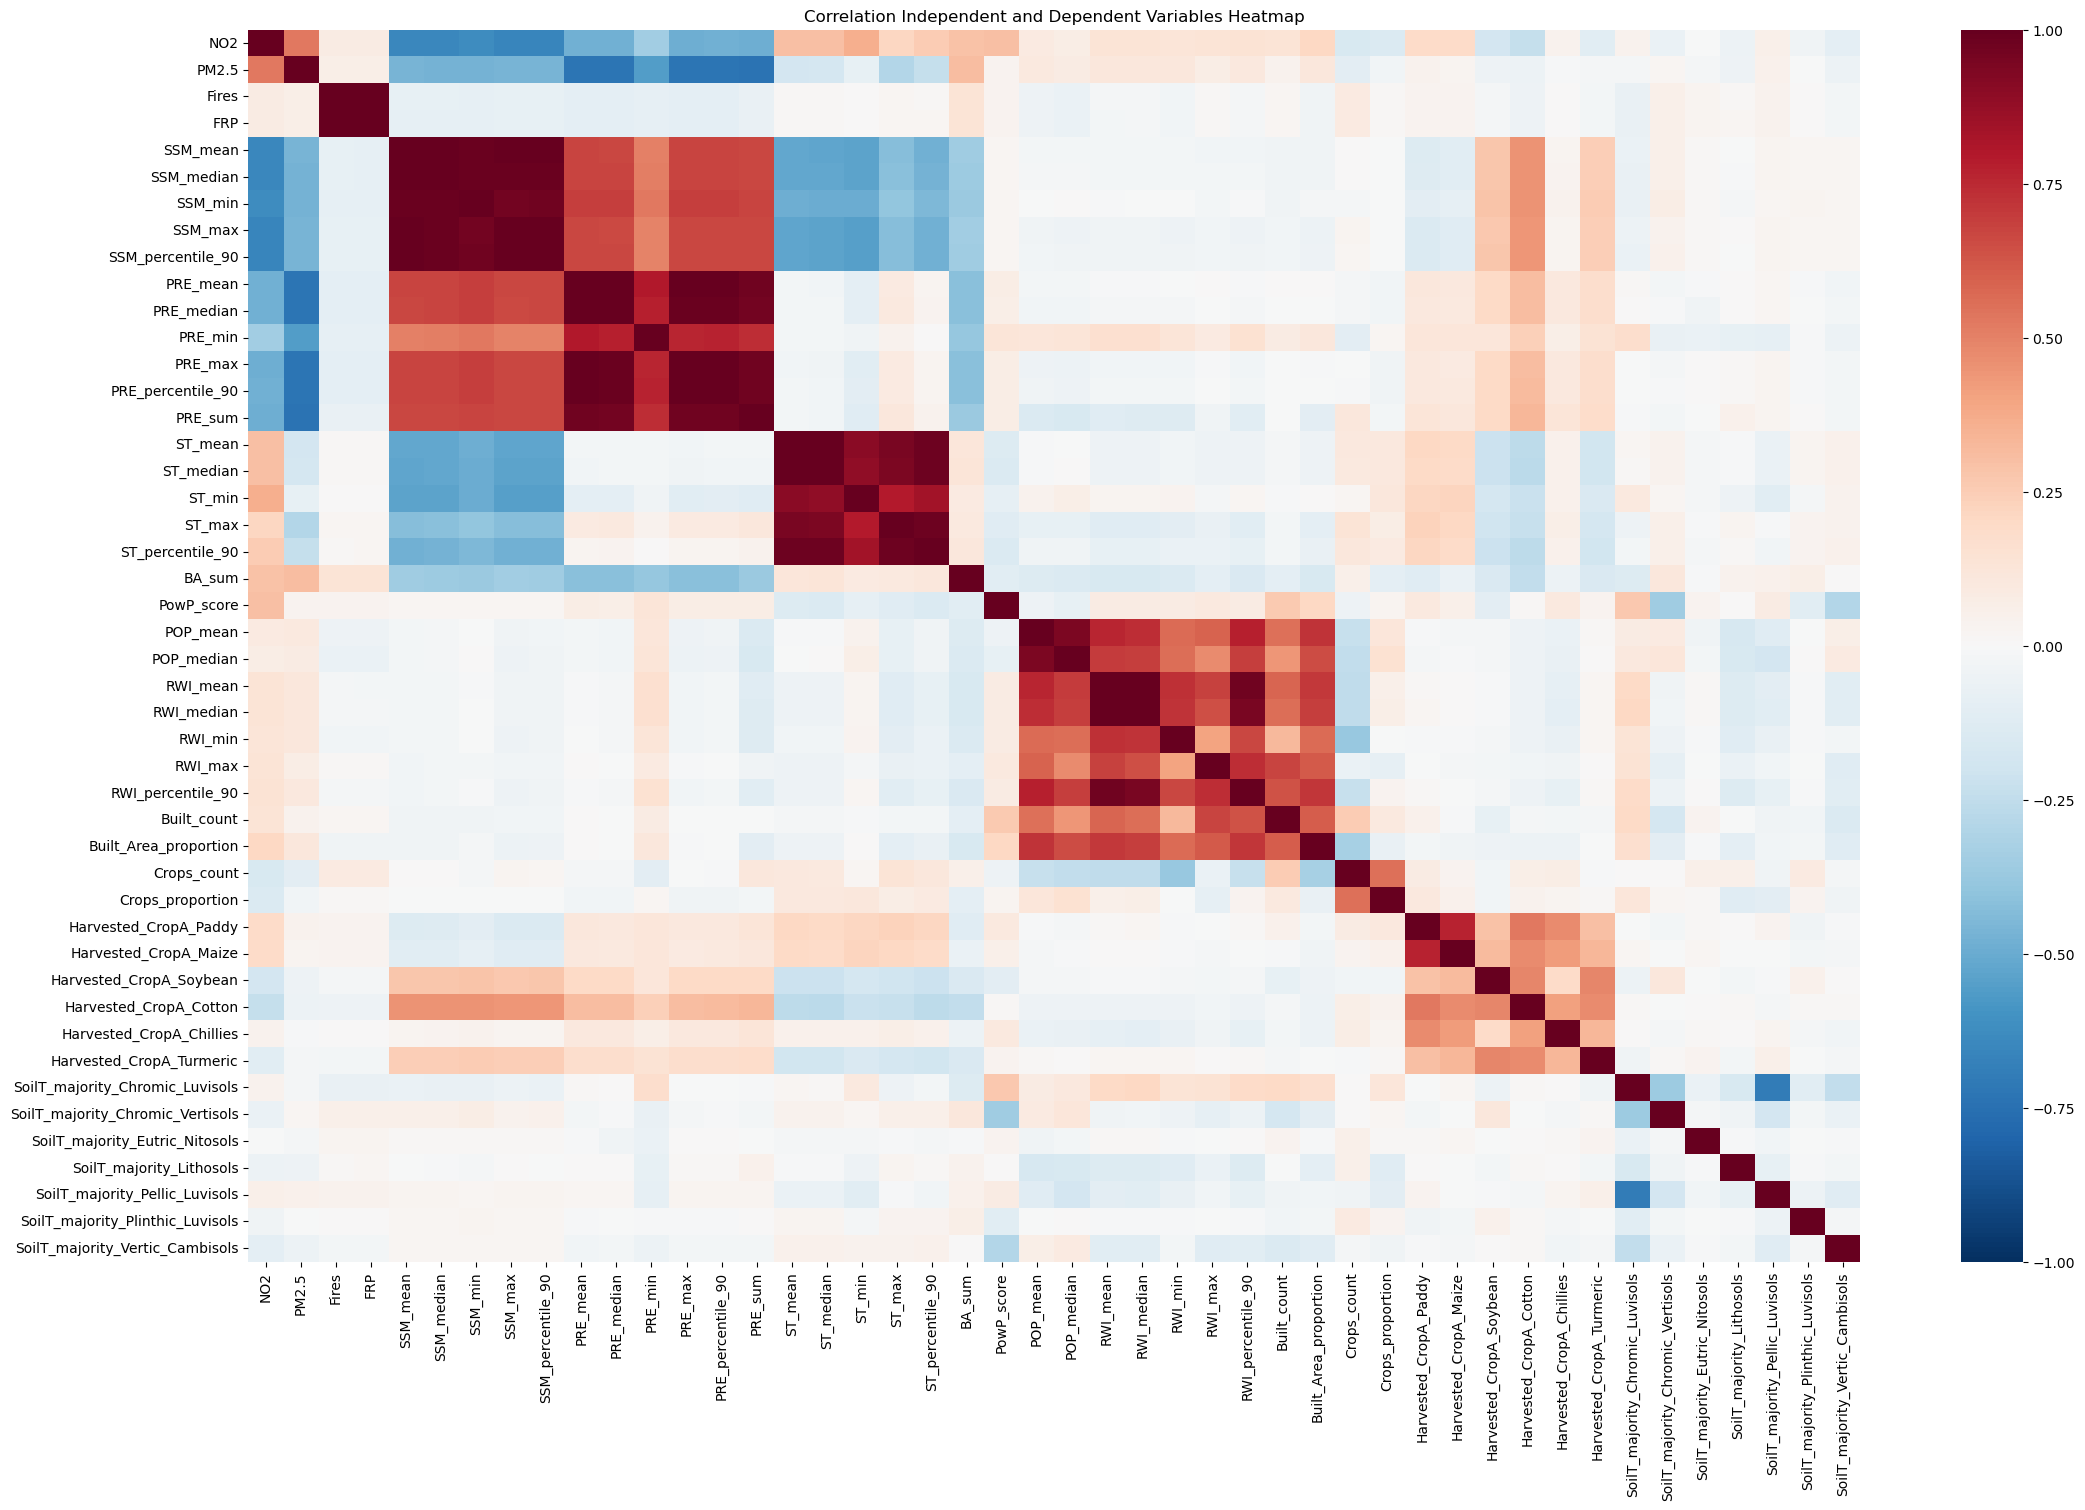

In [612]:
data_corr = data_all[all]


plt.figure(figsize=(26, 16))
heatmap = sns.heatmap(data_corr.corr(method='spearman'), vmin=-1, vmax=1, annot=False, cmap = 'RdBu_r')
heatmap.set_title('Correlation Independent and Dependent Variables Heatmap')
plt.show()

# Geo plots

In [460]:
predictors = ['NO2', 'PM2.5', 'Fires', 'FRP']
predictors_units = ['billion molecules per mm3', 'ug per m3', 'number of fires', 'MW']

features_environmental = ['SSM_mean', 'SSM_median', 'SSM_min', 'SSM_max', 'SSM_percentile_90', 'ST_mean', 'ST_median', 'ST_min', 'ST_max', 'ST_percentile_90', 'PRE_mean', 'PRE_median', 'PRE_min', 'PRE_max', 'PRE_percentile_90', 'PRE_sum', 'BA_sum']
features_environmental_units = [ 'mm', 'mm', 'mm', 'mm', 'mm',  'degrees', 'degrees', 'degrees', 'degrees', 'degrees', 'mm', 'mm', 'mm', 'mm', 'mm', 'mm', 'km2']

features_socio_economic=['RWI_mean', 'RWI_median', 'RWI_min', 'RWI_max', 'RWI_percentile_90', 'PowP_score','POP_mean', 'POP_median', 'Built_count', 'Built_Area_proportion']
features_socio_economic_units = ['-', '-', '-', '-', '-', 'score', 'population per km2', 'populaion per km2', 'km2',  '-']

features_agricultural=['Crops_count', 'Crops_proportion', 'Harvested_CropA_Paddy', 'Harvested_CropA_Maize', 'Harvested_CropA_Soybean', 'Harvested_CropA_Cotton', 'Harvested_CropA_Chillies', 'Harvested_CropA_Turmeric']
features_agricultural_units = ['km2', '-', 'km2', 'km2', 'km2', 'km2', 'km2', 'km2']

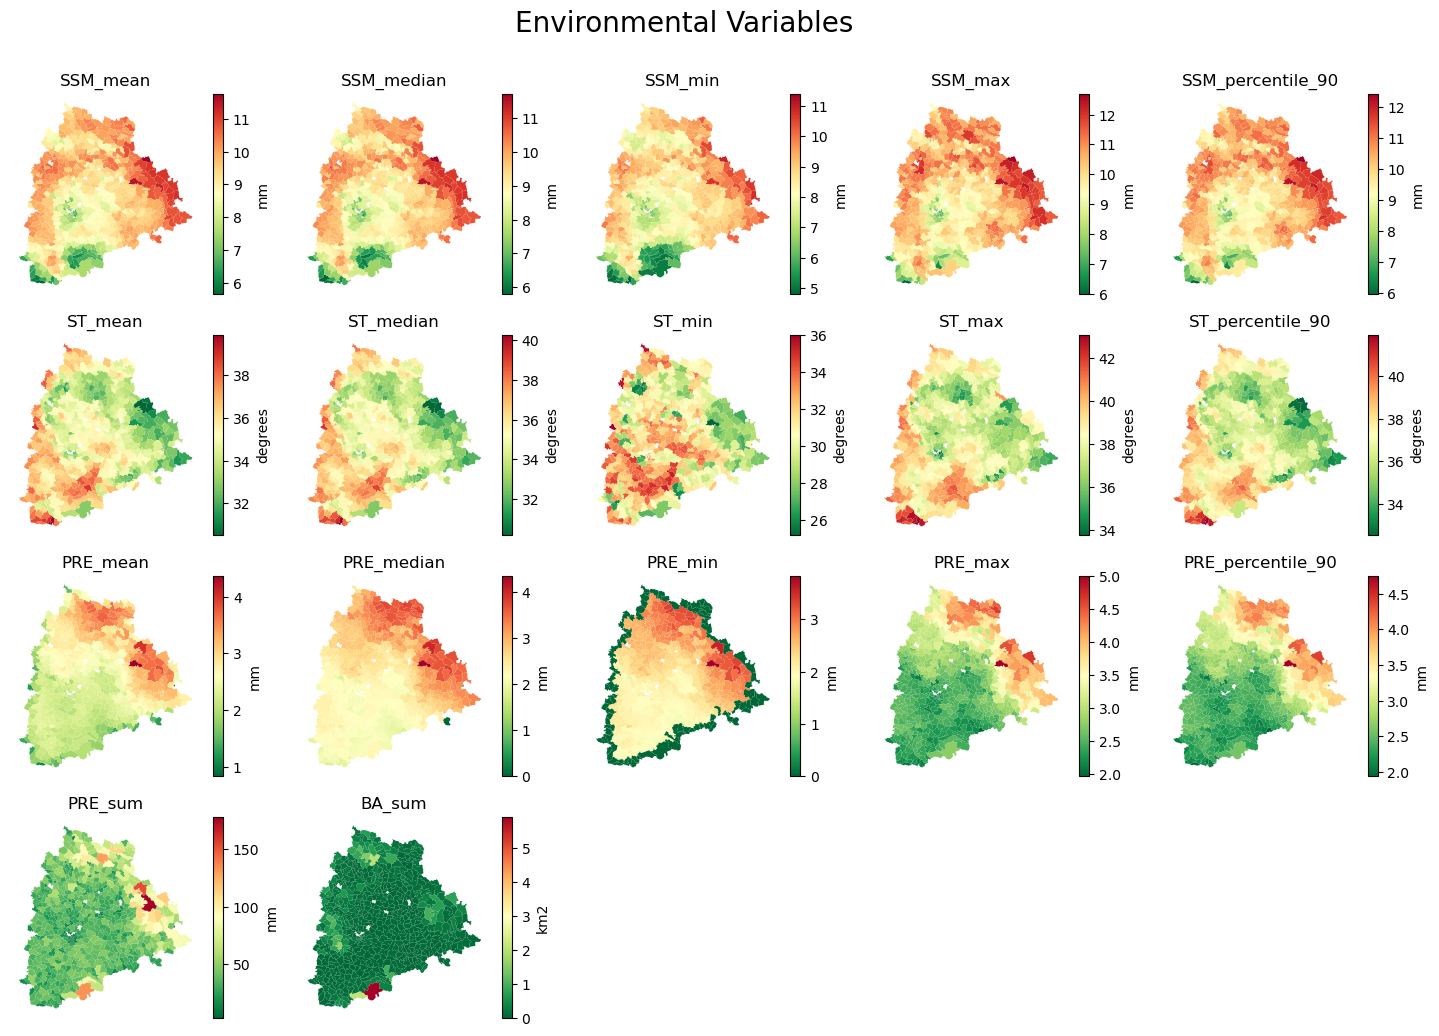

In [462]:
df = data_features.groupby('index')[features_environmental].mean().reset_index()
df = pd.merge(df, mandal_boundaries[['index', 'geometry']], on=['index'], how='left')
df = gpd.GeoDataFrame(df, geometry = df.geometry, crs = {'init': 'epsg:4326'}) 

plt.figure(figsize=(18, 12))
plt.subplots_adjust(hspace=0.2)
plt.suptitle("Environmental Variables", fontsize=20, y=0.95)

# loop through tickers and axes
for n, column in enumerate(df.columns[1:-1]):
    # add a new subplot iteratively
    ax = plt.subplot(4, 5, n + 1)
    df.plot(column = column, ax=ax, legend=True, legend_kwds = {'label':  features_environmental_units[n]},  cmap = 'RdYlGn_r')
    ax.set_title(column)
    ax.axis('off')

plt.show()

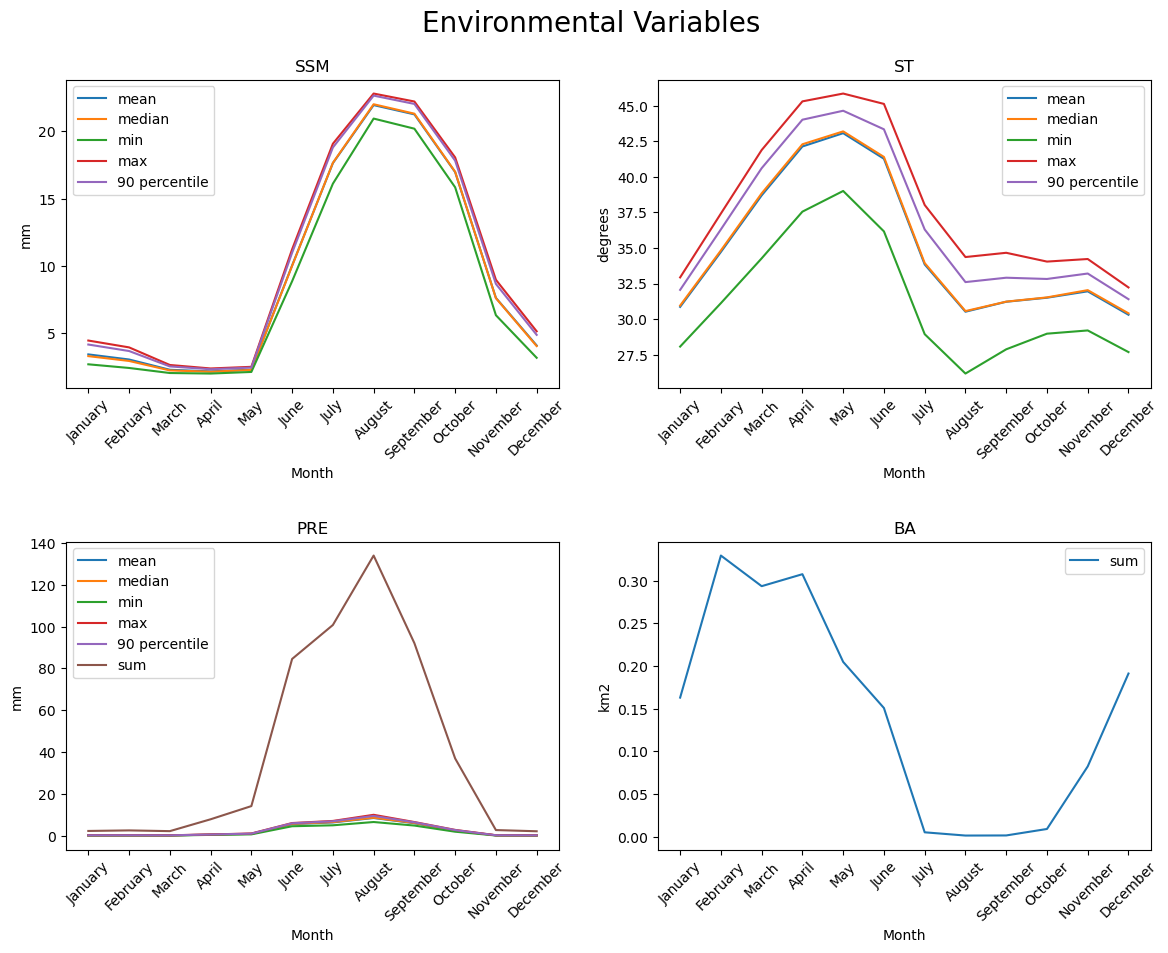

In [590]:
df_month = data_features.groupby('Month')[features_environmental].mean().reset_index()
df_month['Month_text'] = 0
for i in range(0, len(df_month)):
        df_month['Month_text'].iloc[i] = calendar.month_name[df_month['Month'].iloc[i]] 

features_cat= [['SSM_mean', 'SSM_median', 'SSM_min', 'SSM_max', 'SSM_percentile_90'], ['ST_mean', 'ST_median', 'ST_min', 'ST_max', 'ST_percentile_90'], ['PRE_mean', 'PRE_median', 'PRE_min', 'PRE_max', 'PRE_percentile_90', 'PRE_sum'], ['BA_sum']]
labels = [['mean', 'median', 'min', 'max', '90 percentile'],['mean', 'median', 'min', 'max', '90 percentile'], ['mean', 'median', 'min', 'max', '90 percentile', 'sum'], ['sum']]
titel = ['SSM', 'ST', 'PRE', 'BA']
units = ['mm', 'degrees', 'mm', 'km2']

plt.figure(figsize=(14, 10))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Environmental Variables", fontsize=20, y=0.95)
for n in range(0,4 ):
    ax = plt.subplot(2, 2, n + 1)

    for column in range(0, len(features_cat[n])):   
        ax.plot(df_month['Month_text'], df_month[features_cat[n][column]], label = labels[n][column])

    ax.set_title(titel[n])
    ax.set_xlabel("Month")
    ax.set_ylabel(units[n])
    ax.legend()
    ax.set_xticklabels(df_month['Month_text'], rotation=45)

plt.show()



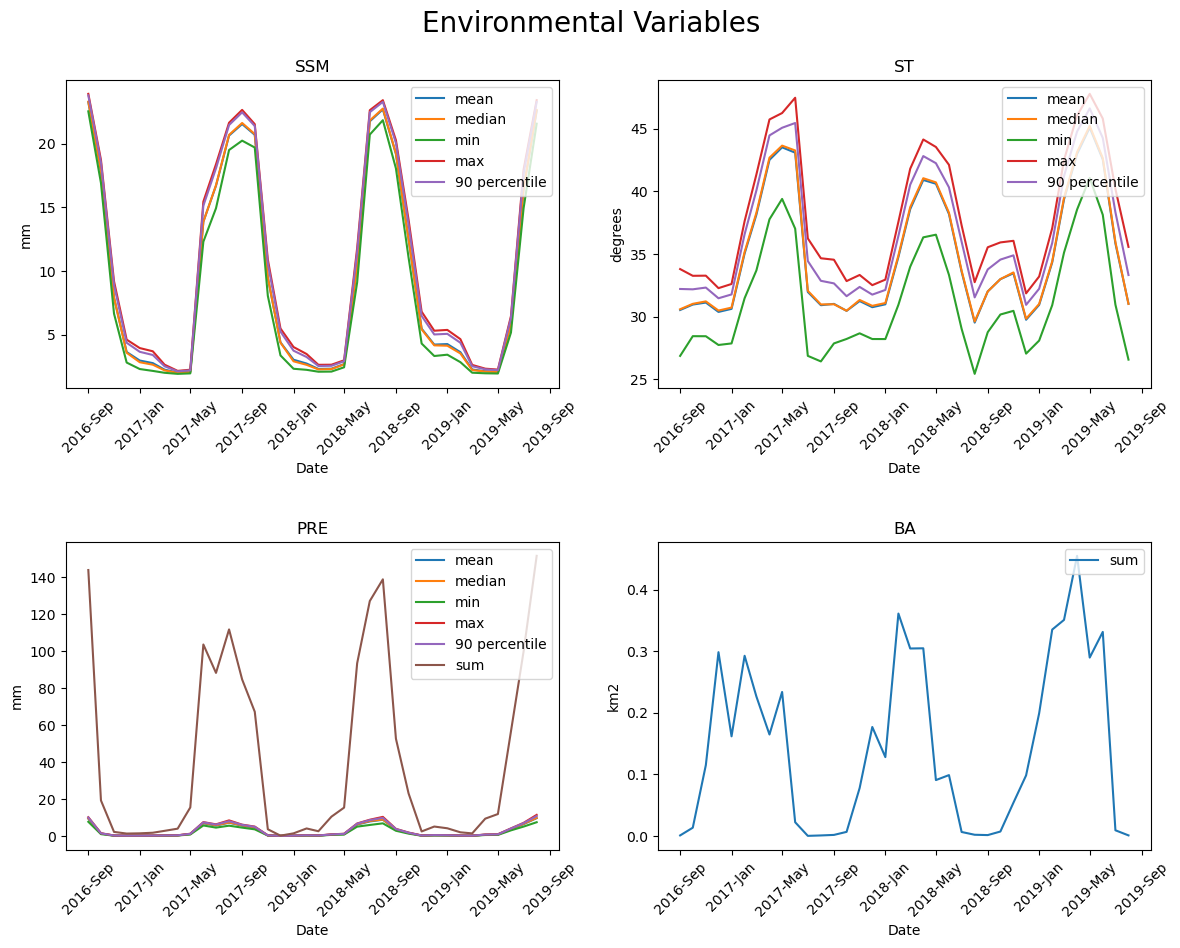

In [606]:
df_month = data_features.groupby('Date')[features_environmental].mean().reset_index()

features_cat= [['SSM_mean', 'SSM_median', 'SSM_min', 'SSM_max', 'SSM_percentile_90'], ['ST_mean', 'ST_median', 'ST_min', 'ST_max', 'ST_percentile_90'], ['PRE_mean', 'PRE_median', 'PRE_min', 'PRE_max', 'PRE_percentile_90', 'PRE_sum'], ['BA_sum']]
labels = [['mean', 'median', 'min', 'max', '90 percentile'],['mean', 'median', 'min', 'max', '90 percentile'], ['mean', 'median', 'min', 'max', '90 percentile', 'sum'], ['sum']]
titel = ['SSM', 'ST', 'PRE', 'BA']
units = ['mm', 'degrees', 'mm', 'km2']

myFmt = mdates.DateFormatter('%Y-%b')

plt.figure(figsize=(14, 10))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Environmental Variables", fontsize=20, y=0.95)
for n in range(0,4 ):
    ax = plt.subplot(2, 2, n + 1)

    for column in range(0, len(features_cat[n])):   
        ax.plot(df_month['Date'], df_month[features_cat[n][column]], label = labels[n][column])

    ax.set_title(titel[n])
    ax.set_xlabel("Date")
    ax.set_ylabel(units[n])
    ax.legend(loc='upper right')
    ax.set_xticklabels(df_month['Date'], rotation=45)
    ax.xaxis.set_major_formatter(myFmt)

plt.show()

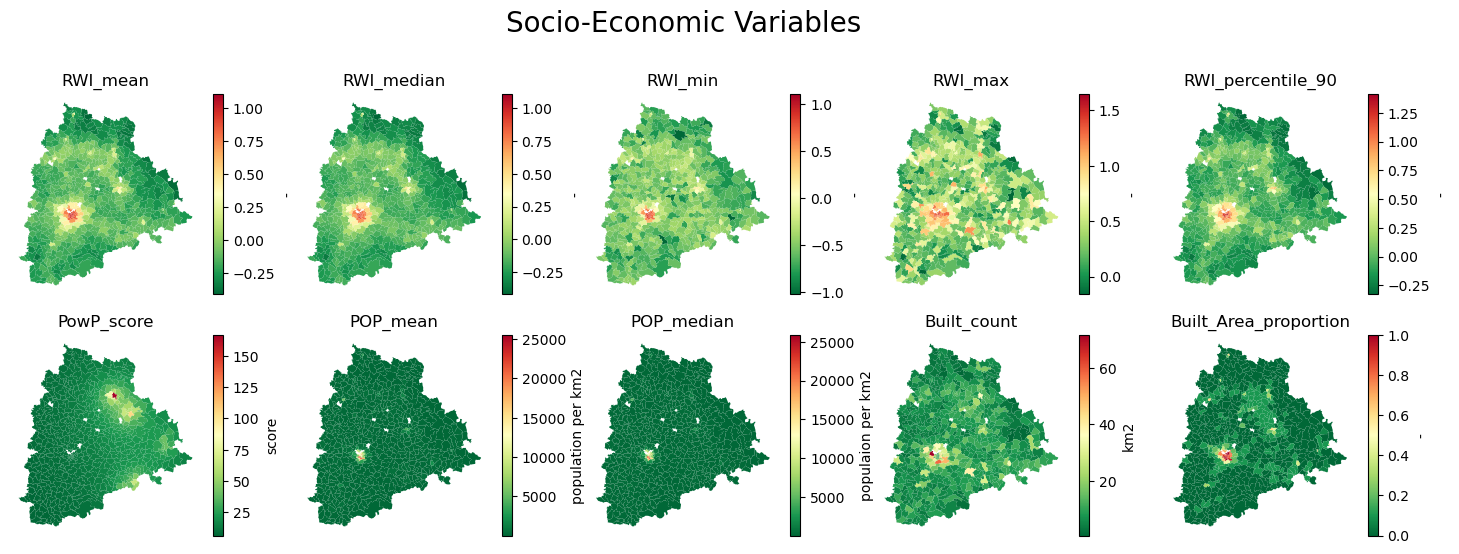

In [473]:
df = data_features.groupby('index')[features_socio_economic].mean().reset_index()
df = pd.merge(df, mandal_boundaries[['index', 'geometry']], on=['index'], how='left')
df = gpd.GeoDataFrame(df, geometry = df.geometry, crs = {'init': 'epsg:4326'}) 

plt.figure(figsize=(18, 12))
plt.subplots_adjust(hspace=0.2)
plt.suptitle("Socio-Economic Variables", fontsize=20, y=0.95)

count = 0
count_max = len(df.columns)-2
# loop through tickers and axes
for n, column in enumerate(df.columns[1:-1]):
    # add a new subplot iteratively
    ax = plt.subplot(4, 5, n + 1)
    df.plot(column = column, ax=ax, legend=True, legend_kwds = {'label':  features_socio_economic_units[n]},  cmap = 'RdYlGn_r')
    ax.set_title(column)
    ax.axis('off')

plt.show()

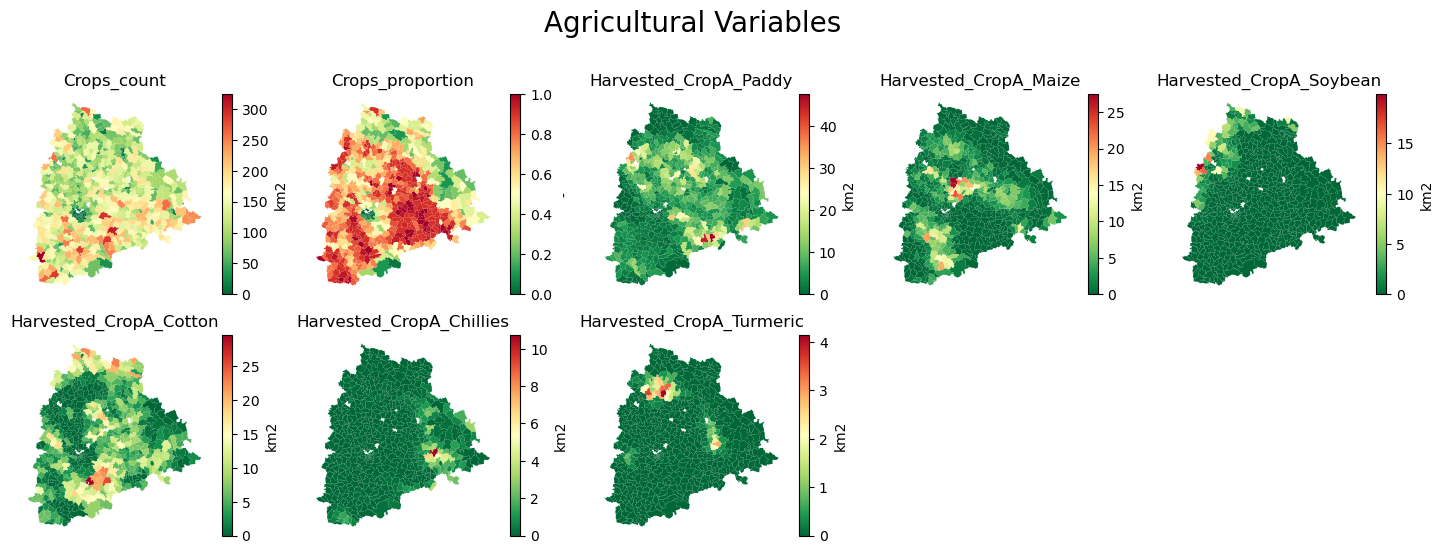

In [625]:
df = data_features.groupby('index')[features_agricultural].mean().reset_index()
df = pd.merge(df, mandal_boundaries[['index', 'geometry']], on=['index'], how='left')
df = gpd.GeoDataFrame(df, geometry = df.geometry, crs = {'init': 'epsg:4326'}) 

plt.figure(figsize=(18, 12))
plt.subplots_adjust(hspace=0.2)
plt.suptitle("Agricultural Variables", fontsize=20, y=0.95)

count = 0
count_max = len(df.columns)-2
# loop through tickers and axes
for n, column in enumerate(df.columns[1:-1]):
    # add a new subplot iteratively
    ax = plt.subplot(4, 5, n + 1)
    df.plot(column = column, ax=ax, legend=True, legend_kwds = {'label':  features_agricultural_units[n]},  cmap = 'RdYlGn_r', vmin=None, vmax=None)
    ax.set_title(column)
    ax.axis('off')

plt.show()

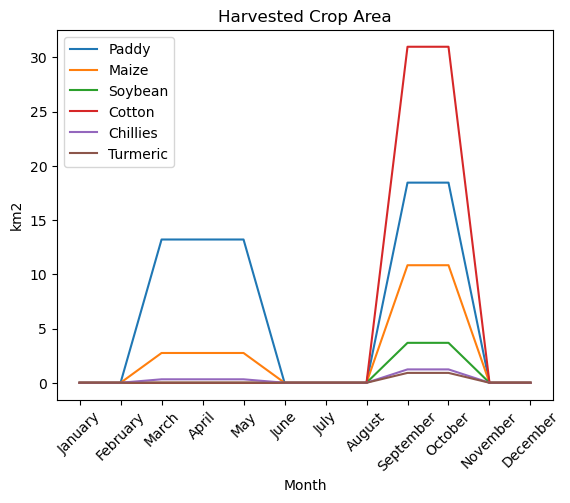

In [591]:
df_month = data_features.groupby('Month')[features_agricultural].mean().reset_index()
df_month['Month_text'] = 0
for i in range(0, len(df_month)):
        df_month['Month_text'].iloc[i] = calendar.month_name[df_month['Month'].iloc[i]] 



Crops = ['Paddy', 'Maize', 'Soybean', 'Cotton', 'Chillies', 'Turmeric']

for column in range(0, len(features_agricultural[2:])):
        plt.plot(df_month['Month_text'], df_month[features_agricultural[2:][column]], label=Crops[column])

plt.legend()
plt.title('Harvested Crop Area')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.ylabel('km2')
plt.show()


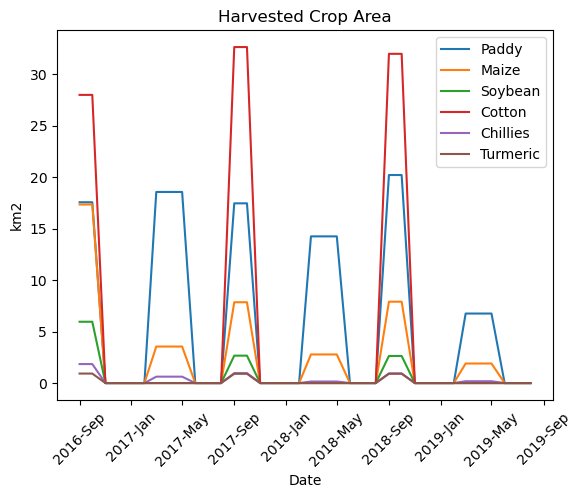

In [602]:
df_month = data_features.groupby('Date')[features_agricultural].mean().reset_index()

myFmt = mdates.DateFormatter('%Y-%b')

Crops = ['Paddy', 'Maize', 'Soybean', 'Cotton', 'Chillies', 'Turmeric']

n = 0
ax = plt.subplot(1, 1, n + 1)
for column in range(0, len(features_agricultural[2:])):
        ax.plot(df_month['Date'], df_month[features_agricultural[2:][column]], label=Crops[column])

ax.set_title('Harvested Crop Area')
ax.set_xlabel("Date")
ax.set_ylabel('km2')
ax.legend()
ax.set_xticklabels(df_month['Date'], rotation=45)
ax.xaxis.set_major_formatter(myFmt)

plt.show()

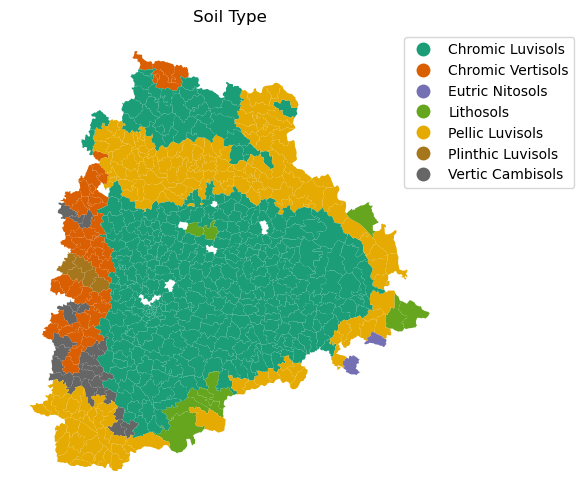

In [564]:
selected = data_all.groupby('index')['Soil Type'].max().reset_index()
selected = pd.merge(selected, mandal_boundaries[['index', 'geometry']], on=['index'], how='left')
selected = gpd.GeoDataFrame(selected, geometry = selected.geometry, crs = {'init': 'epsg:4326'}) 

fig, ax = plt.subplots(1, figsize = (12, 6))
selected.plot(ax=ax, column = 'Soil Type', legend=True,  cmap='Dark2')
plt.title('Soil Type')
plt.axis('off')

leg = ax.get_legend()
leg.set_bbox_to_anchor((1.1,0.8, 0.2, 0.2))


plt.show()

# Predictors

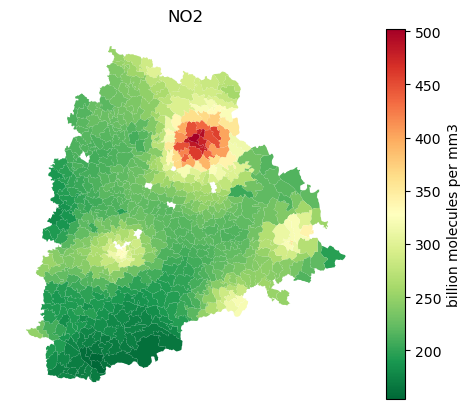

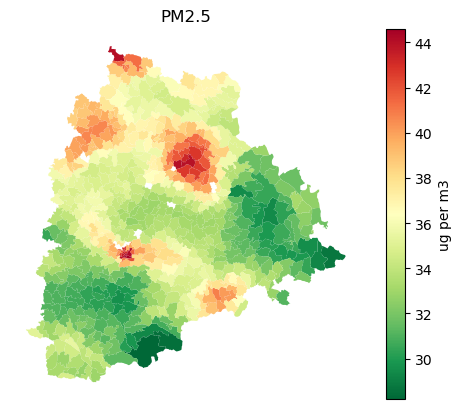

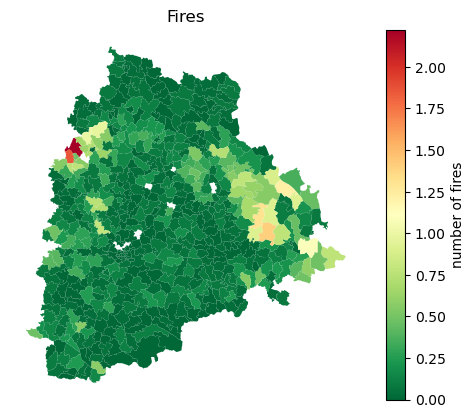

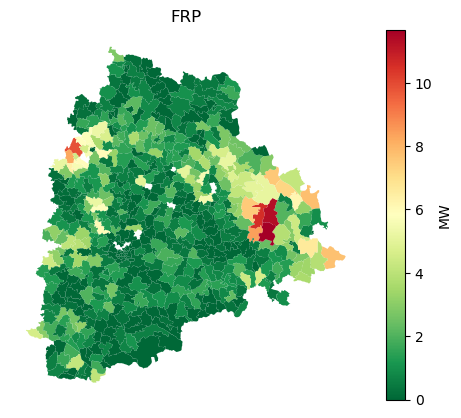

In [379]:
for predictor in range(0, len(predictors)):
    geo_plot(predictors[predictor], data_all, predictors_units[predictor])

# Environmental Features

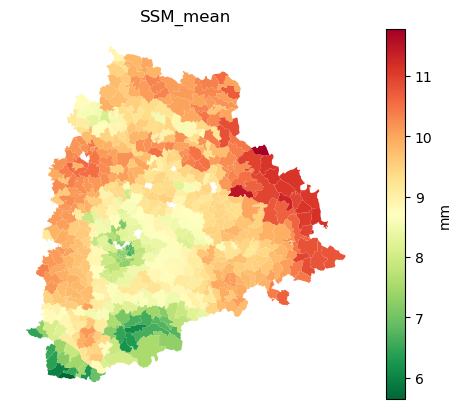

AttributeError: 'Line2D' object has no property 'figsize'

In [385]:
for feature in range(0, len(features_environmental)):
    geo_plot(features_environmental[feature], data_all, features_environmental_units[feature])